In [188]:
import pandas as pd
import altair as alt
import numpy as np
import scipy
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt
import time

In [3]:
raw_data_hr = pd.read_json('data_dump_spo2.json', orient='index')
raw_data_hr['tst'] = raw_data_hr['tst'] * 1000
raw_data_hr = raw_data_hr.loc[(raw_data_hr['ir'] != 0) & (raw_data_hr['red'] != 0)]
#aw_data_hr.rename(columns={'raw_readings_ir':'ir', 'raw_readings_red':'red'}, inplace=True)
#raw_data_hr = raw_data_hr.loc[(raw_data_hr['ir'] > 50000) & (raw_data_hr['red'] != 0)].reset_index(drop=True).reset_index()
#raw_data_hr = raw_data_hr.loc[raw_data_hr.index<5000]
raw_data_hr #[['raw_readings_ir','raw_readings_red']]

result_red      mean_red           w_ir     result_ir     ir  \
0     32792.000000  32792.000000   42600.000000  42600.000000  42600   
1     31136.400000  31964.200000   83086.000000  40486.000000  42616   
2     29579.580000  31169.326667  121587.700000  38501.700000  42656   
3     28020.601000  30382.145250  157940.315000  36352.615000  42432   
4     26435.570950  29592.830390  192067.299250  34126.984250  42024   
...            ...           ...            ...           ...    ...   
4996    -15.743244    -40.256481  969116.826350    143.324929  48592   
4997    -94.956082    -42.243657  969044.985032    -71.841317  48384   
4998   -146.208278    -49.731474  968856.735781   -188.249252  48264   
4999   -162.897864    -60.044900  968629.898992   -226.836789  48216   
5000   -138.752971    -67.442655  968382.404042   -247.494950  48184   

              w_red               tst       mean_ir    red  
0      32792.000000  1593276147668000  42600.000000  32792  
1      63928.400000  1593276147669000  41543.000000  32776  
2      93507.980000  1593276147670000  40529.233333  32776  
3     121528.581000  1593276147671000  39485.078750  32696  
4     147964.151950  1593276147672000  38413.459850  32512  
...             ...               ...           ...    ...  
4996  678859.121636  1593276208121000     98.914701  33928  
4997  678764.165554  1593276208146000     87.568966  33848  
4998  678617.957276  1593276208172000     64.790518  33792  
4999  678455.059412  1593276208195000     37.550992  33768  
5000  678316.306442  1593276208220000      6.073442  33784  

[5001 rows x 9 columns]

In [516]:
i_rms_red = np.sqrt(raw_data_hr[2000:4000]['result_red'].apply(lambda j: j*j).sum()/len(x))
i_dc_red = 40200
i_rms_ir = np.sqrt(raw_data_hr[2000:4000]['result_ir'].apply(lambda j: j*j).sum()/len(x))
i_dc_ir = 27100
R = (i_rms_red * 600 * i_dc_ir) / (i_rms_ir * 900 * i_dc_red) 

R

0.25924391864844076

In [517]:
0.98 = K1 -  K2 * 0.259

0.94 = K1 -  K2 * 0.19

0.94 = K1 -  K2 * 0.19

95.74158447433575

In [534]:
b, a = scipy.signal.butter(1, 0.01, 'low', fs=1, output='ba')
raw_data_hr['butterworth_red'] = scipy.signal.filtfilt(b, a, raw_data_hr['result_red'])

data = raw_data_hr[2000:]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='butterworth_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [520]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [522]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [535]:
data = raw_data_hr[2000:2500]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='mean_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [525]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='mean_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [526]:
raw_data_hr_melted = raw_data_hr.melt(value_vars=['ir','red'], id_vars='tst')
raw_data_hr_melted

tst variable  value
0      1593276147668000       ir  42600
1      1593276147669000       ir  42616
2      1593276147670000       ir  42656
3      1593276147671000       ir  42432
4      1593276147672000       ir  42024
...                 ...      ...    ...
9997   1593276208121000      red  33928
9998   1593276208146000      red  33848
9999   1593276208172000      red  33792
10000  1593276208195000      red  33768
10001  1593276208220000      red  33784

[10002 rows x 3 columns]

In [528]:
data = raw_data_hr[1000:2000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [529]:
alt.Chart(raw_data_hr_melted).mark_line().encode(
    x='tst',
    y=alt.Y('value:Q',
        scale=alt.Scale(domain=(10000, 65000))
    ),
    color='variable'
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [425]:
class dcFilter_t:
    def __init__(self):
        self.w = None
        self.result = None

def dc_filter(x, alpha=0.95):
    print(x.ir, x.name)
    if x.name ==0:
        prev_w = 0
    filtered = {'w':None, 'result': None}
    filtered['w'] = x.ir + alpha * prev_w ;
    filtered['result'] = filtered['w'] - prev_w;
    return filtered



In [426]:
def _wR(i, col):
    x_i = raw_data_hr_melted.loc[raw_data_hr_melted['variable'] == col, 'value'].loc[i]
    if i==0:
        return x_i
    return x_i + _wR(i-1, col)

def _w(x, col): 
    return _wR(int(x.name), col)

In [427]:
_filtered = {}

for i in raw_data_hr.index:
    _filtered[i] = {}
    if i==0:
        _filtered[i]['w_ir'] = raw_data_hr.loc[i, 'ir']
        _filtered[i]['result_ir'] = _filtered[i]['w_ir']
    else:
        _filtered[i]['w_ir'] = raw_data_hr.loc[i, 'ir'] + 0.95 * _filtered[i-1]['w_ir']
        _filtered[i]['result_ir'] = _filtered[i]['w_ir'] - _filtered[i-1]['w_ir']
        
for i in raw_data_hr.index:
    if i==0:
        _filtered[i]['w_red'] = raw_data_hr.loc[i, 'red']
        _filtered[i]['result_red'] = _filtered[i]['w_red']
    else:
        _filtered[i]['w_red'] = raw_data_hr.loc[i, 'red'] + 0.95 * _filtered[i-1]['w_red']
        _filtered[i]['result_red'] = _filtered[i]['w_red'] - _filtered[i-1]['w_red']

In [428]:
_filtered

{0: {'w_ir': 21376, 'result_ir': 21376, 'w_red': 11192, 'result_red': 11192},
 1: {'w_ir': 41739.2,
  'result_ir': 20363.199999999997,
  'w_red': 21832.4,
  'result_red': 10640.400000000001},
 2: {'w_ir': 61036.24,
  'result_ir': 19297.04,
  'w_red': 31908.78,
  'result_red': 10076.379999999997},
 3: {'w_ir': 79384.42799999999,
  'result_ir': 18348.187999999987,
  'w_red': 41489.341,
  'result_red': 9580.561000000002},
 4: {'w_ir': 96823.20659999998,
  'result_ir': 17438.77859999999,
  'w_red': 50606.87395,
  'result_red': 9117.53295},
 5: {'w_ir': 113422.04626999998,
  'result_ir': 16598.83967,
  'w_red': 59276.5302525,
  'result_red': 8669.6563025},
 6: {'w_ir': 129190.94395649998,
  'result_ir': 15768.8976865,
  'w_red': 67536.703739875,
  'result_red': 8260.173487374996},
 7: {'w_ir': 144163.396758675,
  'result_ir': 14972.452802175016,
  'w_red': 75391.86855288123,
  'result_red': 7855.164813006239},
 8: {'w_ir': 158395.22692074123,
  'result_ir': 14231.830162066239,
  'w_red': 82

In [429]:
filtered = pd.DataFrame(_filtered).transpose()
filtered = filtered.loc[(filtered.index>500) ].reset_index(drop=True).reset_index()
filtered['median_filter_ir'] = scipy.signal.medfilt(filtered['result_ir'], 9)
#butter
b, a = scipy.signal.butter(1, 10/100, 'low', fs=100, output='ba')
filtered['butterworth_red'] = scipy.signal.filtfilt(b, a, filtered['result_red'])
filtered

index           w_ir   result_ir          w_red  result_red  \
0         0  445965.778665   64.959018  280021.204217   32.568199   
1         1  446027.489731   61.711067  280052.144006   30.939789   
2         2  446086.115245   58.625513  280081.536806   29.392800   
3         3  446837.809482  751.694238  280365.459966  283.923160   
4         4  446943.919008  106.109526  280427.186967   61.727002   
...     ...            ...         ...            ...         ...   
4285   4285  421805.192439 -313.957497  257757.127470 -117.743551   
4286   4286  421450.932817 -354.259622  257637.271097 -119.856374   
4287   4287  421114.386176 -336.546641  257563.407542  -73.863555   
4288   4288  420874.666867 -239.719309  257477.237165  -86.170377   
4289   4289  420798.933524  -75.733343  257507.375307   30.138142   

      median_filter_ir  butterworth_red  
0            58.625513        15.246632  
1            61.711067        15.289600  
2            64.959018        15.331949  
3            90.975655        15.371216  
4            90.975655        15.404586  
...                ...              ...  
4285       -195.744733        -5.766814  
4286       -195.744733        -5.743169  
4287       -195.744733        -5.715494  
4288       -195.744733        -5.684553  
4289        -75.733343        -5.651705  

[4290 rows x 7 columns]

In [430]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [431]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='result_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [432]:
alt.Chart(filtered.loc[(filtered.index>540) & (filtered.index<2380)]).mark_line().encode(
    x='index',
    y='median_filter_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [433]:
x = filtered.loc[(filtered.index>540) & (filtered.index<2380)]
x

index           w_ir   result_ir          w_red  result_red  \
541     541  455840.410106   58.925784  282106.429324   -1.391017   
542     542  455896.389601   55.979495  282105.107858   -1.321466   
543     543  455949.570121   53.180520  282103.852465   -1.255393   
544     544  456112.091615  162.521494  282126.659842   22.807377   
545     545  456162.487034   50.395419  282140.326850   13.667008   
...     ...            ...         ...            ...         ...   
2375   2375  433850.096398  155.258084  269466.516970   40.709633   
2376   2376  433813.591578  -36.504820  269441.191122  -25.325849   
2377   2377  433786.911999  -26.679579  269433.131565   -8.059556   
2378   2378  433769.566399  -17.345600  269433.474987    0.343422   
2379   2379  433785.088079   15.521680  269433.801238    0.326251   

      median_filter_ir  butterworth_red  
541          55.979495        -6.996068  
542          55.979495        -7.007888  
543          55.979495        -7.019933  
544          55.979495        -7.032443  
545          53.180520        -7.045803  
...                ...              ...  
2375        -14.118466        -6.597716  
2376        -13.412543        -6.612406  
2377        -14.118466        -6.627180  
2378        -13.412543        -6.641810  
2379         14.745596        -6.656632  

[1839 rows x 7 columns]

0.23462436239284046

SyntaxError: invalid syntax (<ipython-input-436-af13a54b8cff>, line 1)

In [437]:
filtered.loc[(filtered.index>540) & (filtered.index<2380)]

index           w_ir   result_ir          w_red  result_red  \
541     541  455840.410106   58.925784  282106.429324   -1.391017   
542     542  455896.389601   55.979495  282105.107858   -1.321466   
543     543  455949.570121   53.180520  282103.852465   -1.255393   
544     544  456112.091615  162.521494  282126.659842   22.807377   
545     545  456162.487034   50.395419  282140.326850   13.667008   
...     ...            ...         ...            ...         ...   
2375   2375  433850.096398  155.258084  269466.516970   40.709633   
2376   2376  433813.591578  -36.504820  269441.191122  -25.325849   
2377   2377  433786.911999  -26.679579  269433.131565   -8.059556   
2378   2378  433769.566399  -17.345600  269433.474987    0.343422   
2379   2379  433785.088079   15.521680  269433.801238    0.326251   

      median_filter_ir  butterworth_red  
541          55.979495        -6.996068  
542          55.979495        -7.007888  
543          55.979495        -7.019933  
544          55.979495        -7.032443  
545          53.180520        -7.045803  
...                ...              ...  
2375        -14.118466        -6.597716  
2376        -13.412543        -6.612406  
2377        -14.118466        -6.627180  
2378        -13.412543        -6.641810  
2379         14.745596        -6.656632  

[1839 rows x 7 columns]

In [438]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='butterworth_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [376]:
data = {
    0: {'v1': 21312,'v2':33223},
    1: {'v1': 21312,'v2':33223},
    2: {'v1': 21312,'v2':33223},
    3: {'v1': 21312,'v2':33223},
    4: {'v1': 21312,'v2':33223},
    5: {'v1': 21312,'v2':33223},
    6: {'v1': 21312,'v2':33223},
}

In [377]:
[v for k,v in data.items()]

[{'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223}]

In [405]:
def get_last_k_readings(data, var, kernel_size):
    x = list(data.items())
    x.reverse()
    return np.array([v[var] for i, v in x if i > len(x) - kernel_size - 1])

In [409]:
data = {
    0: {'v1': 21312,'v2':33223},
}

In [410]:
get_last_k_readings(data, 'v1', 10)

array([21312])

In [450]:
scipy.signal.butter(1, 7.5/100, 'low', fs=100, output='ba')

(array([0.00235066, 0.00235066]), array([ 1.        , -0.99529868]))

### Heart Rate using FFT

In [213]:
a,b = 3000, 4800
t_vec = np.array(raw_data_hr[a:b]['tst'])
t_vec = (t_vec - 1593276160000000)/1e6
ir_vec = np.array(raw_data_hr[a:b]['ir'])
red_vec = np.array(raw_data_hr[a:b]['red'])
samp_rate = 1/np.mean(np.diff(t_vec))
samp_rate

50.83787831689603

In [214]:
heart_rate_range = [0,250] # BPM

In [215]:
heart_rate_range_hz = np.divide(heart_rate_range,60.0)

In [216]:
max_time_bw_samps = 1/heart_rate_range_hz[1]
max_time_bw_samps

0.24

In [217]:
max_pts_bw_samps = max_time_bw_samps*samp_rate
max_pts_bw_samps

12.201090796055047

BPM: 1.7


/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


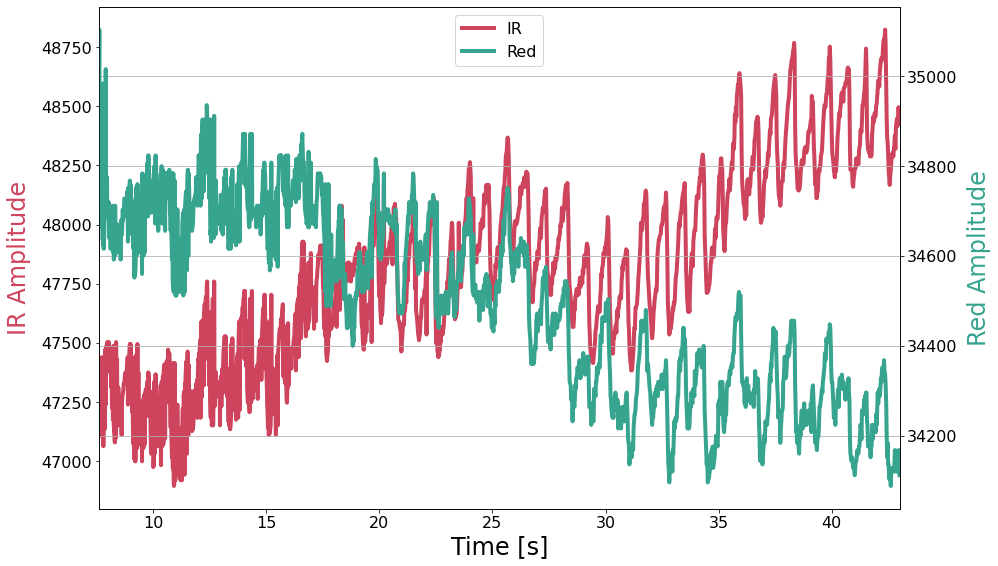

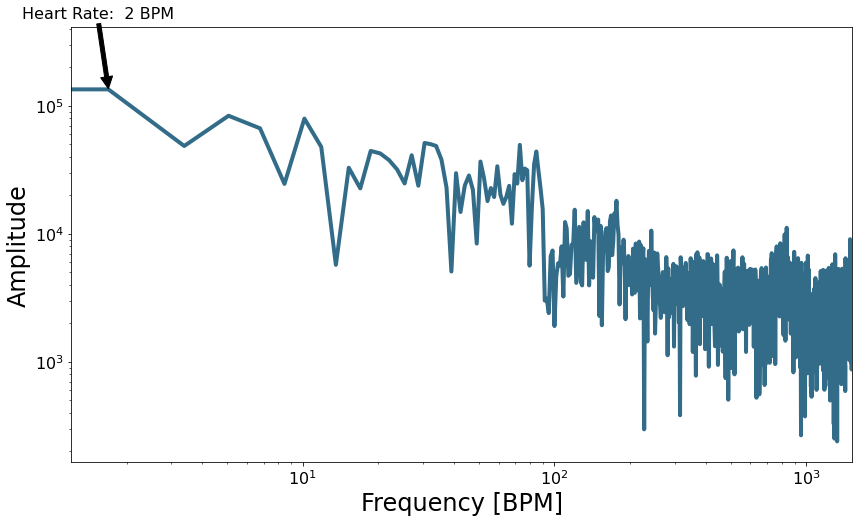

In [218]:
## plotting time series data
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time [s]',fontsize=24)
ax1.set_ylabel('IR Amplitude',fontsize=24,color='#CE445D',labelpad=10)
ax1.tick_params(axis='both',which='major',labelsize=16)
plt1 = ax1.plot(t_vec,ir_vec,label='IR',color='#CE445D',linewidth=4)
ax1_2 = plt.twinx()
ax1_2.grid('off')
ax1_2.set_ylabel('Red Amplitude',fontsize=24,color='#37A490',labelpad=10)
ax1_2.tick_params(axis='y',which='major',labelsize=16)
plt2 = ax1_2.plot(t_vec,red_vec,label='Red',color='#37A490',linewidth=4)
lns = plt1+plt2
labels = [l.get_label() for l in lns]
ax1_2.legend(lns,labels,fontsize=16,loc='upper center')
plt.xlim([t_vec[0],t_vec[-1]])
plt.tight_layout(pad=1.2)

## FFT and plotting frequency spectrum of data
f_vec = np.arange(0,int(len(t_vec)/2))*(samp_rate/(len(t_vec)))
f_vec = f_vec*60
fft_var = np.fft.fft(red_vec)
x,y,z = np.abs(fft_var[0]),2.0*np.abs(fft_var[1:int(len(fft_var)/2)]),np.abs(fft_var[int(len(fft_var)/2)])
fft_var = np.append(y,z)

bpm_max_loc = np.argmin(np.abs(f_vec-heart_rate_range[1]))
f_step = 1
f_max_loc = np.argmax(fft_var[f_step:bpm_max_loc])+f_step
print('BPM: {0:2.1f}'.format(f_vec[f_max_loc]))
fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(111)
ax2.loglog(f_vec,fft_var,color=[50/255,108/255,136/255],linewidth=4)
ax2.set_xlim([0,f_vec[-1]])
ax2.set_ylim([np.min(fft_var)-np.std(fft_var),np.max(fft_var)])
ax2.tick_params(axis='both',which='major',labelsize=16)
ax2.set_xlabel('Frequency [BPM]',fontsize=24)
ax2.set_ylabel('Amplitude',fontsize=24)
ax2.annotate('Heart Rate: {0:2.0f} BPM'.format(f_vec[f_max_loc]),
             xy = (f_vec[f_max_loc],fft_var[f_max_loc]+(np.std(fft_var)/10)),xytext=(-10,70),
             textcoords='offset points',arrowprops=dict(facecolor='k'),
             fontsize=16,horizontalalignment='center')
fig2.savefig('max30102_fft_heart_rate.png',dpi=300,facecolor=[252/255,252/255,252/255])
plt.show()

## Using Gradient Appx

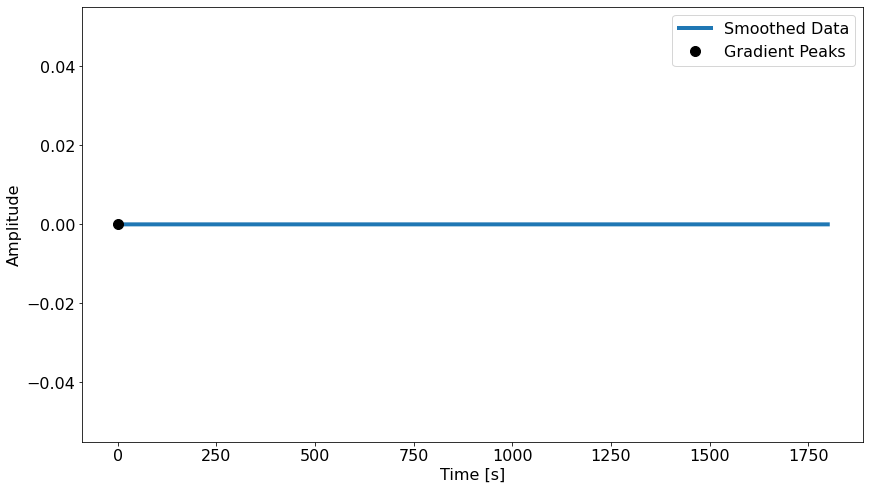

BPM: 56.8


/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [219]:
heart_rate_span = [10,250] # max span of heart rate
pts = 1800 # points used for peak finding (400 Hz, I recommend at least 4s (1600 pts)
smoothing_size = 20 # convolution smoothing size

# setup live plotting
plt.ion()
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(np.arange(0,pts),np.zeros((pts,)),linewidth=4,label='Smoothed Data')
line2, = ax1.plot(0,0,label='Gradient Peaks',marker='o',linestyle='',color='k',markersize=10)
ax1.set_xlabel('Time [s]',fontsize=16)
ax1.set_ylabel('Amplitude',fontsize=16)
ax1.legend(fontsize=16)
ax1.tick_params(axis='both',which='major',labelsize=16)
plt.show()


    
# convolve, calculate gradient, and remove bad endpoints

t_vals,y_vals = [], []

samp_rate = 1/np.mean(np.diff(t_vals)) # average sample rate for determining peaks
min_time_bw_samps = (60.0/heart_rate_span[1])

t_vals = t_vec
y_vals = red_vec

y_vals = np.convolve(y_vals,np.ones((smoothing_size,)),'same')/smoothing_size
red_grad = np.gradient(y_vals,t_vals)
red_grad[0:int(smoothing_size/2)+1] = np.zeros((int(smoothing_size/2)+1,))
red_grad[-int(smoothing_size/2)-1:] = np.zeros((int(smoothing_size/2)+1,))  

y_vals = np.append(np.repeat(y_vals[int(smoothing_size/2)],int(smoothing_size/2)),y_vals[int(smoothing_size/2):-int(smoothing_size/2)])
y_vals = np.append(y_vals,np.repeat(y_vals[-int(smoothing_size/2)],int(smoothing_size/2)))

# update plot with new Time and red/IR data
line1.set_xdata(t_vals)
line1.set_ydata(y_vals)

ax1.set_xlim([np.min(t_vals),np.max(t_vals)])
if line1.axes.get_ylim()[0]<0.95*np.min(y_vals) or\
   np.max(y_vals)>line1.axes.get_ylim()[1] or\
   np.min(y_vals)<line1.axes.get_ylim()[0]:
                ax1.set_ylim([np.min(y_vals),np.max(y_vals)])
#plt.pause(0.001)

# peak locator algorithm
peak_locs = np.where(red_grad<-np.std(red_grad))
# if len(peak_locs[0])==0:
#     continue

prev_pk = peak_locs[0][0]
true_peak_locs,pk_loc_span = [],[]
for ii in peak_locs[0]:
    y_pk = y_vals[ii]
    if (t_vals[ii]-t_vals[prev_pk])<min_time_bw_samps:
        pk_loc_span.append(ii)
    else:
        if pk_loc_span==[]:
            true_peak_locs.append(ii)
        else:
            true_peak_locs.append(int(np.mean(pk_loc_span)))
            pk_loc_span = []

    prev_pk = int(ii)

t_peaks = [t_vals[kk] for kk in true_peak_locs]
# if t_peaks==[]:
#     continue
# else:
print('BPM: {0:2.1f}'.format(60.0/np.mean(np.diff(t_peaks))))
ax1.set_title('{0:2.0f} BPM'.format(60.0/np.mean(np.diff(t_peaks))),fontsize=24)

# plot gradient peaks on original plot to view how BPM is calculated
scatter_x,scatter_y = [],[]
for jj in true_peak_locs:
    scatter_x.append(t_vals[jj])
    scatter_y.append(y_vals[jj])

line2.set_data(scatter_x,scatter_y)

#plt.pause(0.001)
#savefig = input("Save Figure? ")

#time.sleep(0.005)

In [210]:
y_vals

array([34992., 34992., 34992., ..., 34992., 34992., 34992.])